In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import OrthogonalMatchingPursuit, orthogonal_mp
from math import sqrt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV
from catboost import CatBoostRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [4]:
X = pd.read_csv('dataset1/inp_z_final.csv', names = ['{}'.format(i) for i in range(5)])
X_test = pd.read_csv('dataset1/inp_z_final_test.csv', names = ['{}'.format(i) for i in range(5)])
Y = pd.read_csv('dataset1/out_gk_final.csv', names = ['{}'.format(i) for i in range(2)])
Y_test = pd.read_csv('dataset1/out_gk_final_test.csv', names = ['{}'.format(i) for i in range(2)])
X.head()

,0,1,2,3,4
0,1,-0.0000,-0.0000,0.0,0.0
1,1,-0.0000,-0.0000,0.0,0.0
2,1,-0.0159,-0.0000,-15.9,0.0
3,1,-0.0159,0.0171,0.0,17.1
4,1,-0.0159,0.0171,0.0,0.0


In [7]:
x_train = np.array(X.iloc[:,1:5])
y_train = np.array(Y.iloc[:,1])
x_test = np.array(X_test.iloc[:,1:5])
y_test = np.array(Y_test.iloc[:,1])

In [8]:
cat = CatBoostRegressor()
t1 = datetime.now()
cat.fit(x_train,y_train)
t2 = datetime.now()

Learning rate set to 0.086822
0:	learn: 0.9233726	total: 80ms	remaining: 1m 19s
1:	learn: 0.8469964	total: 87.4ms	remaining: 43.6s
2:	learn: 0.7778001	total: 94ms	remaining: 31.2s
3:	learn: 0.7144675	total: 99.9ms	remaining: 24.9s
4:	learn: 0.6568181	total: 105ms	remaining: 20.9s
5:	learn: 0.6039326	total: 111ms	remaining: 18.4s
6:	learn: 0.5553708	total: 117ms	remaining: 16.6s
7:	learn: 0.5107961	total: 122ms	remaining: 15.1s
8:	learn: 0.4711539	total: 127ms	remaining: 13.9s
9:	learn: 0.4339342	total: 133ms	remaining: 13.2s
10:	learn: 0.4001826	total: 138ms	remaining: 12.4s
11:	learn: 0.3697556	total: 144ms	remaining: 11.8s
12:	learn: 0.3413823	total: 149ms	remaining: 11.3s
13:	learn: 0.3154927	total: 154ms	remaining: 10.9s
14:	learn: 0.2917473	total: 159ms	remaining: 10.5s
15:	learn: 0.2700751	total: 168ms	remaining: 10.3s
16:	learn: 0.2503719	total: 173ms	remaining: 10s
17:	learn: 0.2321232	total: 178ms	remaining: 9.73s
18:	learn: 0.2156732	total: 184ms	remaining: 9.49s
19:	learn: 0

In [9]:
print('Time taken by Cat Boosting:',t2-t1)

y_pred = cat.predict(x_test)
print('Root mean square error of Cat Boost Model: ',sqrt(mean_squared_error(y_test,y_pred)))

Time taken by Cat Boosting: 0:00:06.831468
Root mean square error of Cat Boost Model:  0.04583664043847187


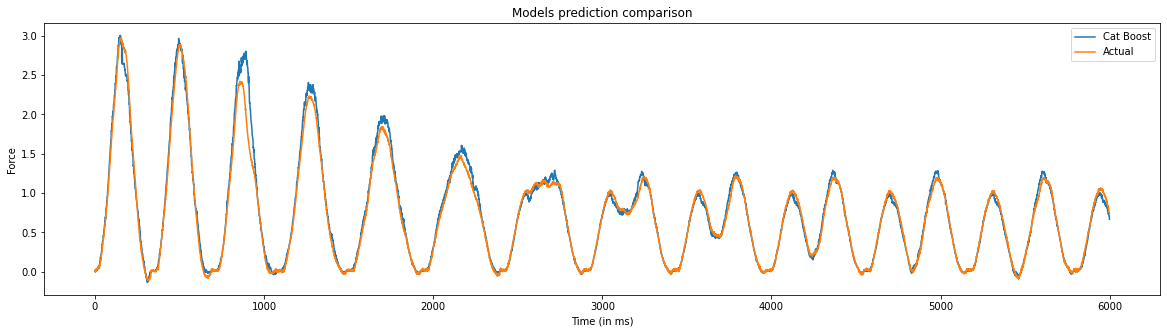

In [10]:
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y_pred[:6000], label = 'Cat Boost')
plt.plot(list(range(6000)),y_test[:6000], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.show()

In [13]:
from scipy import *
from scipy.linalg import norm, pinv
import math

from matplotlib import pyplot as plt
 
class RBF:
     
    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        self.centers = [np.random.uniform(-1, 1, indim) for i in range(numCenters)]
        self.beta = 8
        self.W = np.random.random((self.numCenters, self.outdim))
         
    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return norm(c-d)**3
     
    def _calcAct(self, X):
        # calculate activations of RBFs
        G = np.zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi,ci] = self._basisfunc(c, x)
        return G
     
    def train(self, X, Y):
        """ X: matrix of dimensions n x indim 
            y: column vector of dimension n x 1 """
         
        # choose random center vectors from training set
        rnd_idx = np.random.permutation(X.shape[0])[:self.numCenters]
        self.centers = [X[i,:] for i in rnd_idx]
         
        #print("center", self.centers)
        # calculate activations of RBFs
        G = self._calcAct(X)
        #print(G)
         
        # calculate output weights (pseudoinverse)
        self.W = np.dot(pinv(G), Y)
         
    def test(self, X):
        """ X: matrix of dimensions n x indim """
         
        G = self._calcAct(X)
        Y = np.dot(G, self.W)
        return Y

# RBF MODEL with k = 100
rbf = RBF(4, 100, 1)
t1 = datetime.now()
rbf.train(x_train, y_train)
t2 = datetime.now()
    
print('\n\nTime taken by RBF Model: ',t2-t1)
y1_pred = rbf.test(x_test)
y2 = y1_pred
print('Root mean square error of RBF Model: ',sqrt(mean_squared_error(y_test,y1_pred)))



Time taken by RBF Model:  0:01:59.502910
Root mean square error of RBF Model:  0.19225039131141436


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

Minimum Error = 4.6878819703888297e-07
Maximum Error = 1.0989153426022154
Median Value of Error = 0.05428404558794575


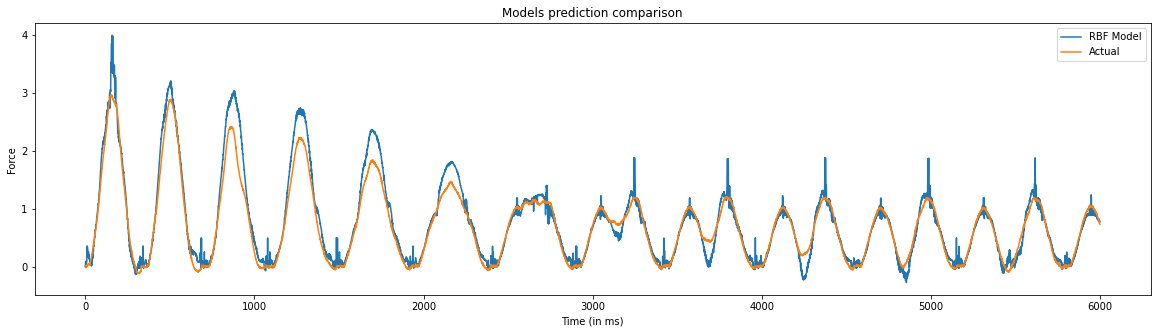

In [14]:
error5 = []
for i in range(len(y_test)):
    error5.append(abs(y1_pred[i]-y_test[i]))
print('Minimum Error =',min(error5))
print('Maximum Error =',max(error5))
error6 = sorted(error5)
print('Median Value of Error =',error6[len(error5)//2])
    
plt.figure(figsize=(20,5))
plt.plot(list(range(6000)),y2[:6000], label = 'RBF Model')
plt.plot(list(range(6000)),y_test[:6000], label = 'Actual')
plt.legend()
plt.xlabel('Time (in ms)')
plt.ylabel('Force')
plt.title('Models prediction comparison')
plt.show()

Time taken by Random Forest 0:00:37.814801
Root Mean Squared error of Random Forest 0.06705272526283095
Minimum Error = 2.9999999998642224e-06
Maximum Error = 0.902973
Median Value of Error = 0.02460400000000007


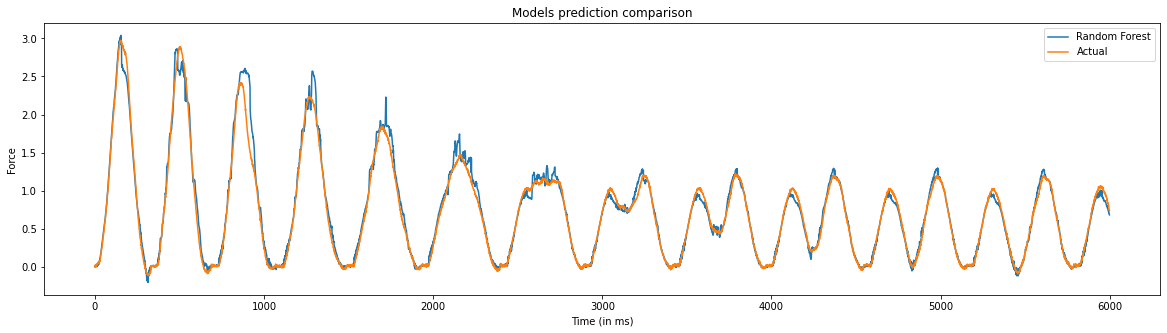

In [15]:
if __name__ == '__main__':
    t1 = datetime.now()
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train)
    t2 = datetime.now()
    print('Time taken by Random Forest',t2-t1)
    
    y1_pred = rf.predict(x_test)
    y1 = y1_pred
    print('Root Mean Squared error of Random Forest',sqrt(mean_squared_error(y_test,y1_pred)))
    
    error = []
    for i in range(len(y_test)):
        error.append(abs(y1_pred[i]-y_test[i]))
    print('Minimum Error =',min(error))
    print('Maximum Error =',max(error))
    error1 = sorted(error)
    print('Median Value of Error =',error1[len(error)//2])
    
    plt.figure(figsize=(20,5))
    plt.plot(list(range(6000)),y1[:6000], label = 'Random Forest')
    plt.plot(list(range(6000)),y_test[:6000], label = 'Actual')
    plt.legend()
    plt.xlabel('Time (in ms)')
    plt.ylabel('Force')
    plt.title('Models prediction comparison')
    plt.show()



Time taken by SVR Model:  0:01:42.929451
Root mean square error of SVR Model:  0.11070871200090264
Minimum Error = 1.77322169403471e-06
Maximum Error = 1.1897317829861205
Median Value of Error = 0.0396030085676079


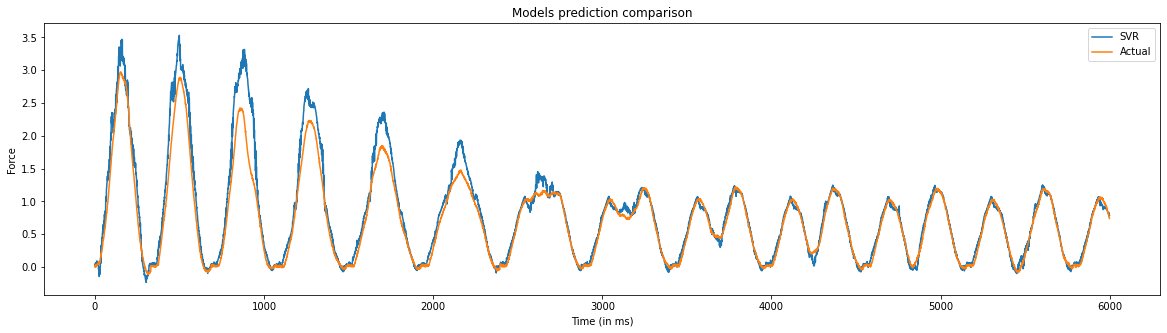

In [17]:
# SVR MODEL
if __name__ == '__main__':
    t1 = datetime.now()
    clf = SVR()
    clf.fit(x_train,y_train)
    t2 = datetime.now()

    print('\n\nTime taken by SVR Model: ',t2-t1)
    y1_pred = clf.predict(x_test)
    y4 = y1_pred
    print('Root mean square error of SVR Model: ',sqrt(mean_squared_error(y_test,y1_pred)))
    
    error7 = []
    for i in range(len(y_test)):
        error7.append(abs(y1_pred[i]-y_test[i]))
    print('Minimum Error =',min(error7))
    print('Maximum Error =',max(error7))
    error8 = sorted(error7)
    print('Median Value of Error =',error8[len(error8)//2])
    
    plt.figure(figsize=(20,5))
    plt.plot(list(range(6000)),y4[:6000], label = 'SVR')
    plt.plot(list(range(6000)),y_test[:6000], label = 'Actual')
    plt.legend()
    plt.xlabel('Time (in ms)')
    plt.ylabel('Force')
    plt.title('Models prediction comparison')
    plt.show()